In [1]:
import pandas as pd
df = pd.read_csv('gs://ggf-eth-data/unprocessed_ethereum_2018_2020')
df.head()

,from_address,to_address,value,gas_value,count
0,0x12df6b56e365f42bb38a885895819a8bcdb8bff8,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,408.608386,1.036399,51
1,0xea2acf1b8a181e8a0f1aa40384d1ddaf096232aa,0x025a9bc3ea7fc8a49704451f61b5ee1eaf488850,2.658300,0.045066,50
2,0x455f011790046a920b5b505cd9188d3c2077d4e4,0x7b7d4a8ee76755d453042dfc05787e464f765638,45.203273,0.052132,59
3,0xd06cd3d829e67ad3455d5035b071813625b0de6b,0x0424b365094898eaa2d64d13f26cd9aaf220cf6c,0.018225,0.123154,74
4,0x69b71b9459e6ebde14a1b337a3720487aec111d4,0x1f39cc033edcac7e2a4f356aec55bee7f1cfdb34,0.859125,0.025099,174


In [5]:
df.loc[df['from_address']=='0x12df6b56e365f42bb38a885895819a8bcdb8bff8']

,from_address,to_address,value,gas_value,count
0,0x12df6b56e365f42bb38a885895819a8bcdb8bff8,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,408.608386,1.036399,51
1320366,0x12df6b56e365f42bb38a885895819a8bcdb8bff8,0x8bde0cf4a73ba210f9422b054e64b911dec3f92c,459.830507,0.079830,22


In [6]:
df.loc[df['to_address']=='0x12df6b56e365f42bb38a885895819a8bcdb8bff8']

,from_address,to_address,value,gas_value,count


In [7]:
df.loc[df['from_address']=='0x025a9bc3ea7fc8a49704451f61b5ee1eaf488850']

,from_address,to_address,value,gas_value,count
111332,0x025a9bc3ea7fc8a49704451f61b5ee1eaf488850,0x9554efa1669014c25070bc23c2df262825704228,10.83769,0.368663,139


In [28]:
data = df[['from_address','to_address','value']].head(1000)
raw_data = data.to_dict('records')

# initialize an empty dictionary
id_to_transactions = {}

# loop through each row of the raw data set
for row in raw_data:
    # extract the ID from the row
    id_ = row['from_address']
    
    # check if the ID is already a key in the dictionary
    if id_ not in id_to_transactions:
        # if it is not, add the ID as a key and set the value to an empty list
        id_to_transactions[id_] = []
    
    # extract the transaction from the row and append it to the list of transactions for the corresponding ID in the dictionary
    transaction = row['value']
    id_to_transactions[id_].append(transaction)

{'0x12df6b56e365f42bb38a885895819a8bcdb8bff8': [408.6083858726659], '0xea2acf1b8a181e8a0f1aa40384d1ddaf096232aa': [2.6583], '0x455f011790046a920b5b505cd9188d3c2077d4e4': [45.20327279999999], '0xd06cd3d829e67ad3455d5035b071813625b0de6b': [0.01822458114945, 0.0579194588188799], '0x69b71b9459e6ebde14a1b337a3720487aec111d4': [0.8591254186212293], '0xca37d9fa40682312dd54665933adac74fd149c58': [31.190217471145463], '0xf1c4c000959369102fd96b4a49764423fe859642': [55.48753220612446], '0x100c5cec9bc22bac6d7c382922f54e04947be248': [17.533813349936008], '0xdd950916596a4c18a1269f7720df98e0998d53c9': [7.405036295286463], '0xdd7de2998a8a6b0d7bcfc02bd173f9915c3a8cf9': [16.832925763], '0xa457f697f02113b188fd66f015a12a719c769479': [52.74966810793165], '0x416299aade6443e6f6e8ab67126e65a7f606eef5': [358.47552563000005, 43.77242714999999], '0x94e2dcf00cf7e33a4643478bb458b8123043116e': [655.1889885689095], '0x94232a512d8aaeb27337df8767ca0519c464c39b': [55.28520248010373], '0x5efd2741049f35a06d815b461e431af9

In [34]:
#jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

In [31]:
len(df['from_address'].unique())

898376

In [33]:
df.shape

(2178388, 5)

In [52]:
out_count = df.groupby('from_address').from_address.count().to_frame('count').reset_index()
out_count

,from_address,count
0,0x0000000000000d9054f605ca65a2647c2b521422,2
1,0x0000000000004681cb5d63ec5098e869a637d9be,2
2,0x0000000000015bbe9a1bfe5ba28e16c69b40a58b,1
3,0x00000000000d7fb20c9708261ad2e0b03f15fa04,1
4,0x0000000000333f28d3a20605c702f66c3143cccf,1
...,...,...
898371,0xffffe7d8929f2634400ef41d4f49f76fd3dd236f,6
898372,0xfffffb89950b81305469740ebdb7641a134930c7,1
898373,0xfffffd033b8d25ee5eb63c818af8171775e91b8f,1
898374,0xfffffff1ac8dcf49f4afd3f90995120e568740f9,1


(array([8.98367e+05, 5.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00]),
 array([1.00000000e+00, 1.00072381e+04, 2.00134762e+04, 3.00197143e+04,
        4.00259524e+04, 5.00321905e+04, 6.00384286e+04, 7.00446667e+04,
        8.00509048e+04, 9.00571429e+04, 1.00063381e+05, 1.10069619e+05,
        1.20075857e+05, 1.30082095e+05, 1.40088333e+05, 1.50094571e+05,
        1.60100810e+05, 1.70107048e+05, 1.80113286e+05, 1.90119524e+05,
        2.00125762e+05, 2.10132000e+05]),
 <BarContainer object of 21 artists>)

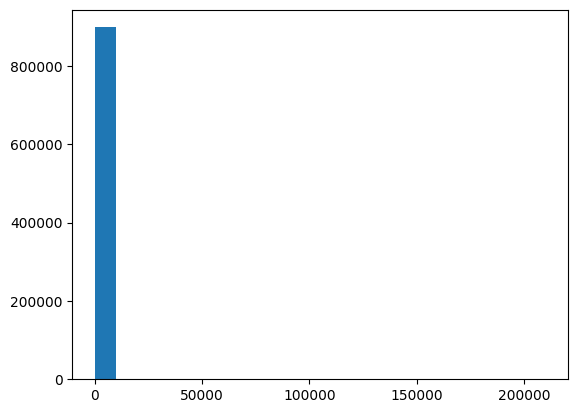

In [55]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.hist(out_count['count'], bins='auto')

In [61]:
out_count['count'].describe()

count    898376.000000
mean          2.424807
std         252.131787
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max      210132.000000
Name: count, dtype: float64

In [75]:
out_count['count'].quantile(0.99)

7.0

In [71]:
out_count['count'].sort_values(ascending=False).head(200)

823367    210132
294844     88441
462042     42482
320166     35807
272201     16604
           ...  
424727       650
710361       648
843844       646
864472       635
741147       631
Name: count, Length: 200, dtype: int64

0.022262393474447226